Intercept, x-Slope : Intercept    1.680076
x            1.058871
dtype: float64


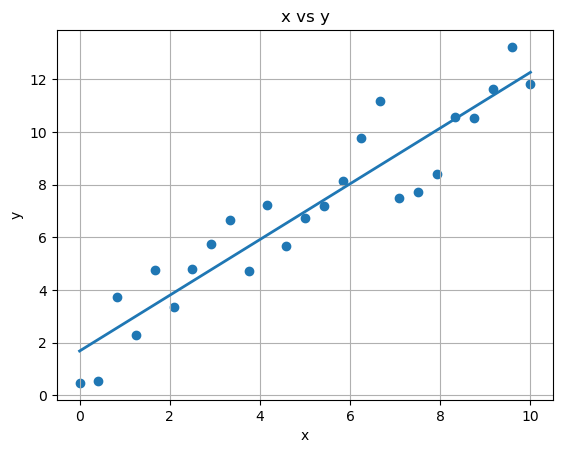

In [19]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

n_points = 25
x = np.linspace(0, 10, n_points)
y = x + (np.random.rand(len(x)) * 5)
data_df = pd.DataFrame({'x': x, 'y': y})

ols_model = smf.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()
print('Intercept, x-Slope : {}'.format(results.params))
y_pred = ols_model.fit().predict(data_df['x'])

plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

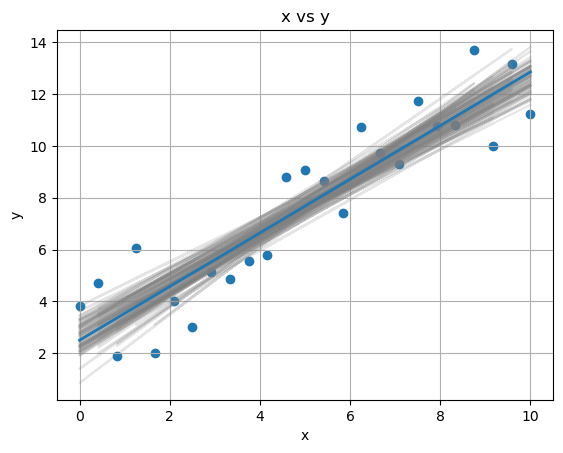

In [13]:
# resample with replacement each row
boot_slopes = []
boot_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # sample the rows, same size, with replacement
    sample_df = data_df.sample(n=n_points, replace=True)
    # fit a linear regression
    ols_model_temp = smf.ols(formula = 'y ~ x', data=sample_df)
    results_temp = ols_model_temp.fit()

    # append coefficients
    boot_interc.append(results_temp.params[0])
    boot_slopes.append(results_temp.params[1])
    # plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
    plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)

# add data points
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

In [14]:
sns.distplot(boot_slopes)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
sns.distplot(boot_interc)
plt.show()

# Resample Residuals (Non-Parametric Bootstrapping)

In [18]:
# create synthetic sample data
n_points = 25
x = np.linspace(0, 10, n_points)
y = x + (np.random.rand(len(x)) * 5)
data_df = pd.DataFrame({'x': x, 'y': y}) # fit linear regression model
ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()# get predicted values
y_pred = results.predict(data_df['x'])# get residual values
resids = results.resid

AttributeError: module 'statsmodels.api' has no attribute 'ols'

In [17]:
boot2_slopes = []
boot2_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # create a sampling of the residuals with replacement
    boot_resids = np.random.choice(resids, n_points, replace=True)
    y_temp = [y_pred_i + resid_i for y_pred_i, resid_i in zip(y_pred, boot_resids)]
    
    sample_df = pd.DataFrame({'x': list(x), 'y': y_temp})
    # Fit a linear regression
    ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
    results_temp = ols_model_temp.fit()
    
    # get coefficients
    boot2_interc.append(results_temp.params[0])
    boot2_slopes.append(results_temp.params[1])
    
    # plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
    plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)# add data points
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

NameError: name 'resids' is not defined

<Figure size 640x480 with 0 Axes>